# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(combined_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [4]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
print(f"Number of unique mice: {number_of_mice}")

Number of unique mice: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

In [8]:
# Optional: Get all the data for the duplicate mouse ID.
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

cleaned_data

In [12]:
# Checking the number of mice in the clean DataFrame.
cleaned_number_of_mice = cleaned_data['Mouse ID'].nunique()
print(f"Number of unique mice after cleaning: {cleaned_number_of_mice}")

Number of unique mice after cleaning: 249


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
).reset_index()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

print(summary_stats)

  Drug Regimen       mean     median   variance   std_dev       sem
0    Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva  52.393463  50.909965  43.138803  6.568014  0.525862
7     Ramicane  40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats_advanced = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
print(summary_stats_advanced)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = cleaned_data.groupby('Drug Regimen').agg(
    mean=('Tumor Volume (mm3)', 'mean'),
    median=('Tumor Volume (mm3)', 'median'),
    variance=('Tumor Volume (mm3)', 'var'),
    std_dev=('Tumor Volume (mm3)', 'std'),
    sem=('Tumor Volume (mm3)', 'sem')
).reset_index()
print(summary_stats_agg)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398
  Drug Regimen       mean     median   variance   std_dev       sem
0    Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177  6.268188  0.469821
2   

## Bar and Pie Charts

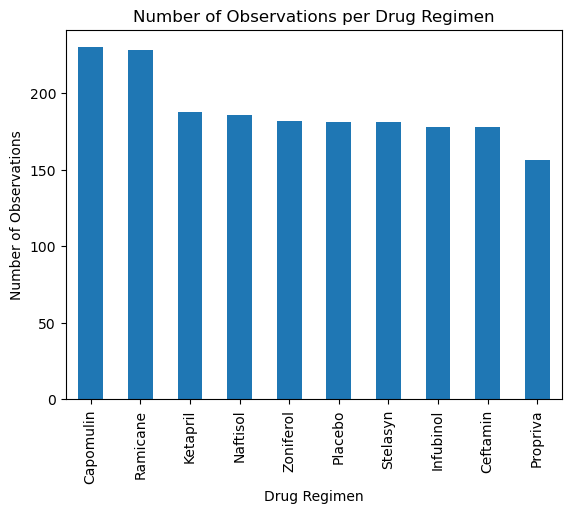

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = cleaned_data['Drug Regimen'].value_counts()
counts.plot(kind='bar', title='Number of Observations per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observations')
plt.show()

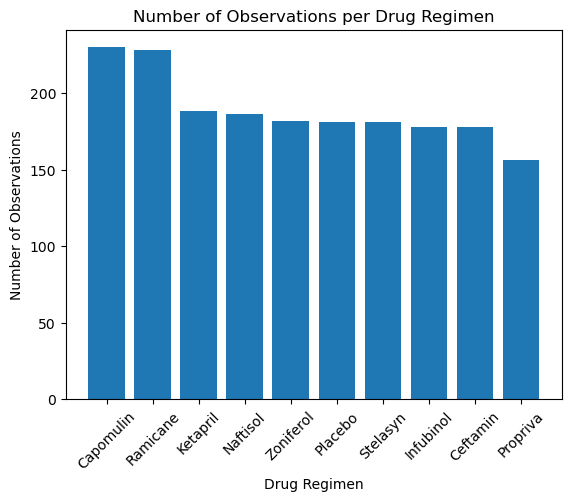

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index, counts.values)
plt.title('Number of Observations per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

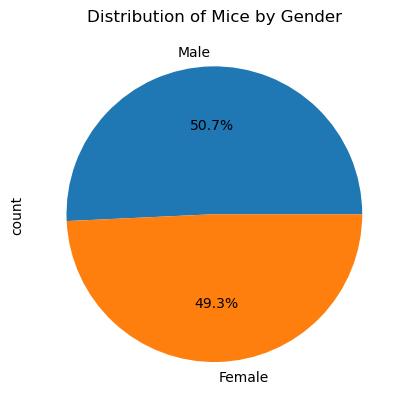

In [22]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_counts = cleaned_data['Sex'].value_counts()
gender_counts.plot.pie(title='Distribution of Mice by Gender', autopct='%1.1f%%')
plt.show()
# Get the unique mice with their gender


# Make the pie chart


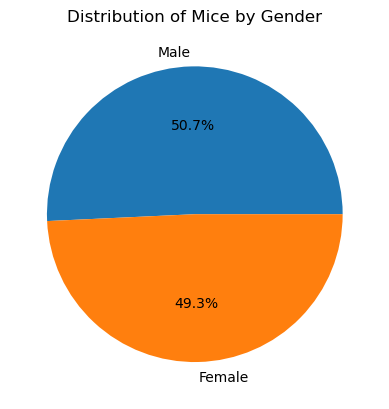

In [24]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Mice by Gender')
plt.show()
# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'])

In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_volumes = []

# Create empty list to fill with tumor vol data (for plotting)
for treatment in treatments:
    volume = last_timepoint_data[last_timepoint_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    treatment_volumes.append(volume)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment, volume in zip(treatments, treatment_volumes):
    quartiles = volume.quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - 1.5 * IQR
    upper_bound = quartiles[0.75] + 1.5 * IQR
    outliers = volume[(volume < lower_bound) | (volume > upper_bound)]
    print(f"{treatment} outliers: {outliers.values}")

    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin outliers: []
Ramicane outliers: []
Infubinol outliers: [36.3213458]
Ceftamin outliers: []


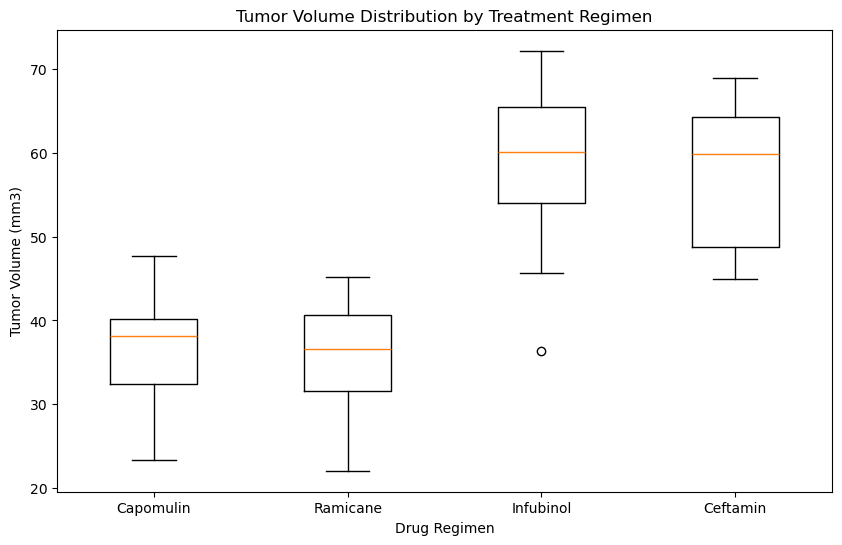

In [45]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(treatment_volumes, tick_labels=treatments)  # Updated parameter name
plt.title('Tumor Volume Distribution by Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

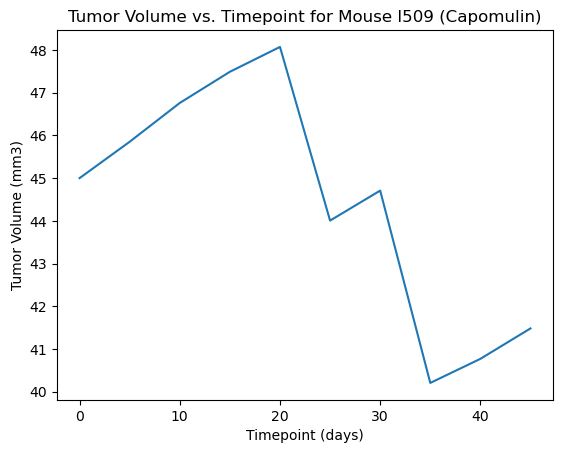

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = cleaned_data[cleaned_data['Mouse ID'] == 'l509']
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Timepoint for Mouse l509 (Capomulin)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

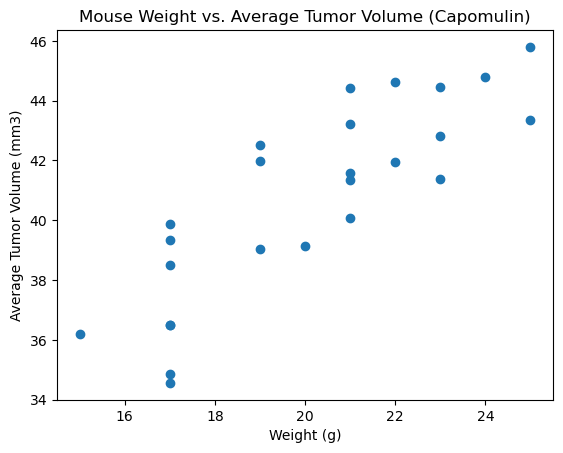

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean().reset_index()

merged_data = pd.merge(avg_tumor_vol, avg_weight, on='Mouse ID')

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

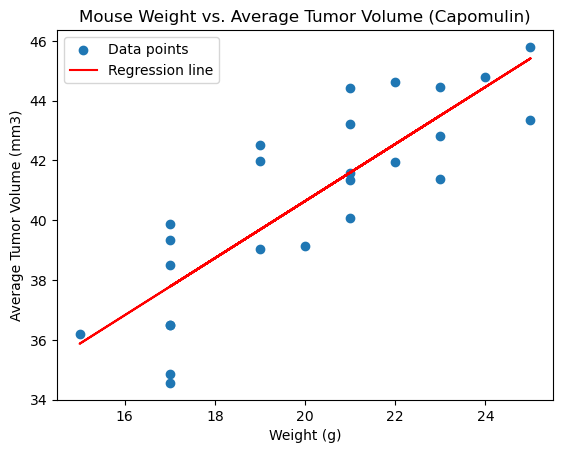

Correlation coefficient: 0.8419363424694722
Linear regression equation: y = 0.95x + 21.55


In [47]:
# Calculate the correlation coefficient and a linear regression model
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], label='Data points')
plt.plot(merged_data['Weight (g)'], intercept + slope * merged_data['Weight (g)'], color='red', label='Regression line')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()

print(f"Correlation coefficient: {correlation}")
print(f"Linear regression equation: y = {slope:.2f}x + {intercept:.2f}")